In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import keras_tuner

seed = 101
tf.keras.utils.set_random_seed(seed)

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]].reshape([28, 28]), cmap=color)
    plt.show()

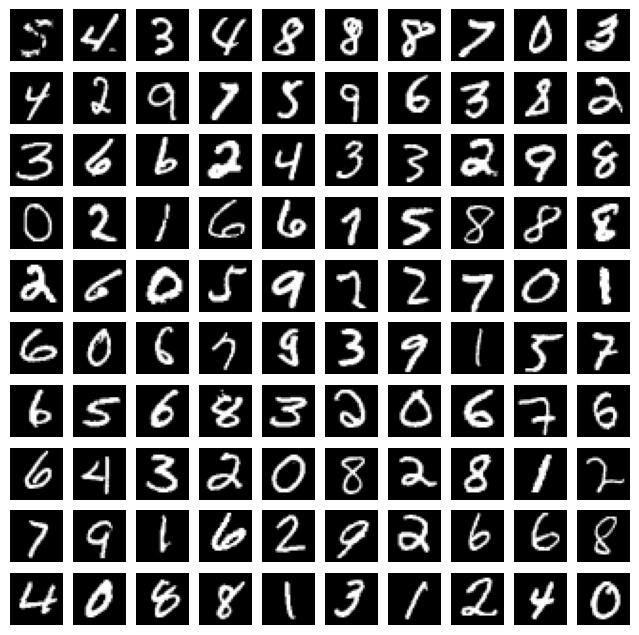

In [ ]:
show_images(x_train)

In [ ]:
print("Num training images: ", x_train.shape[0])
print("Num test images: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[0])

Num training images:  60000
Num test images:  10000
Dimension input:  (60000, 28, 28)
Dimension output:  (60000,)
Output example:  5


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### DEFINING NEURAL NETWORK ARCHITECTURE

### Model for SGD

In [ ]:
import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(64, activation="relu", kernel_initializer="random_normal"))
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="random_normal"))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="random_normal"))


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>]

In [ ]:
for layer in range(1, len(model.layers)):
  weight, bias = model.layers[layer].get_weights()
  print(f"Layer: {layer}")
  print(f"Weight shape: {weight.shape}")
  print(f"Bias shape: {bias.shape}")

Layer: 1
Weight shape: (784, 64)
Bias shape: (64,)
Layer: 2
Weight shape: (64, 128)
Bias shape: (128,)
Layer: 3
Weight shape: (128, 10)
Bias shape: (10,)


### MODEL FOR ADAM OPT

In [ ]:
import keras

model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape = [28,28]))
model_2.add(keras.layers.Dense(64, activation="relu", kernel_initializer="random_normal"))
model_2.add(keras.layers.Dense(128, activation="relu", kernel_initializer="random_normal"))
model_2.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="random_normal"))

## TRAINING WITH SGD

In [ ]:
from keras.src.ops import SparseCategoricalCrossentropy
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [ ]:
hist = model.fit(
    x_train,y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2159 - loss: 2.2758 - val_accuracy: 0.6436 - val_loss: 2.0307
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6620 - loss: 1.7588 - val_accuracy: 0.7843 - val_loss: 0.8903
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8046 - loss: 0.7899 - val_accuracy: 0.8521 - val_loss: 0.5453
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8542 - loss: 0.5361 - val_accuracy: 0.8756 - val_loss: 0.4429
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8736 - loss: 0.4505 - val_accuracy: 0.8859 - val_loss: 0.3945
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8846 - loss: 0.4066 - val_accuracy: 0.8928 - val_loss: 0.3655
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8920 - loss: 0.3788 - val_accuracy: 0.8982 - val_loss: 0.3454
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8973 - loss: 0.3589 - val_accuracy: 0.

### TRAINING WITH ADAM OPTIMIZER

In [ ]:
from keras.src.ops import SparseCategoricalCrossentropy
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, weight_decay=0.1),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [ ]:
hist_adam = model_2.fit(
    x_train,y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9799 - loss: 0.0731 - val_accuracy: 0.9616 - val_loss: 0.1461
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9760 - loss: 0.0764 - val_accuracy: 0.9669 - val_loss: 0.1089
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0819 - val_accuracy: 0.9630 - val_loss: 0.1208
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.0964 - val_accuracy: 0.9661 - val_loss: 0.1191
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9705 - loss: 0.0938 - val_accuracy: 0.9664 - val_loss: 0.1197
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9702 - loss: 0.0949 - val_accuracy: 0.9650 - val_loss: 0.1160
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.9691 - val_loss: 0.1065
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9714 - loss: 0.0921 - val_accuracy: 0.

### STANDARD SGD LOSS CURVE PLOT

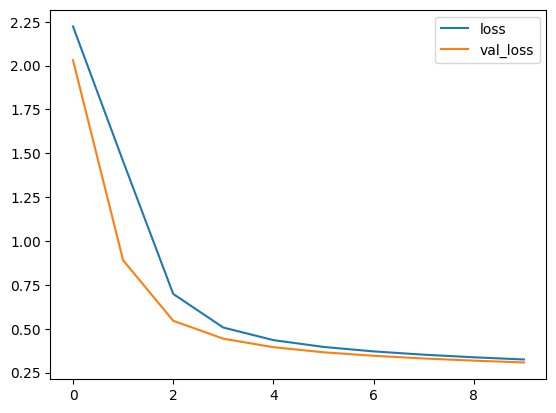

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

### ADAM LOSS CURVE PLOT

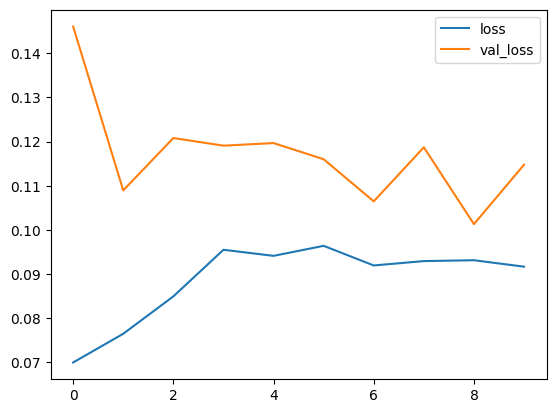

In [ ]:
plt.plot(hist_adam.history['loss'], label='loss')
plt.plot(hist_adam.history['val_loss'], label='val_loss')
plt.legend()

### TUNING WITH KERAS TUNER

In [ ]:
from keras_tuner.tuners import RandomSearch,GridSearch
def nn_tuner(nn):
  model = keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

  for layer in range(nn.Choice("num_layers", [2,3,4,5])):
    model.add(keras.layers.Dense(nn.Choice("units", [16, 28, 32, 50]),
                          nn.Choice("activation", ["relu", "sigmoid", "tanh"]),
                          kernel_initializer="random_normal"))

  model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="random_normal"))

  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
      loss = keras.losses.SparseCategoricalCrossentropy(),
      metrics = ["accuracy"]
  )
  return model

In [ ]:
tuner = RandomSearch(
    nn_tuner, objective = "val_accuracy",
    max_trials = 10, overwrite = True
)

In [ ]:
tuner.search(x_train, y_train, epochs=3, validation_data=(x_test,y_test))

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.8841000199317932

Best val_accuracy So Far: 0.9487000107765198
Total elapsed time: 00h 03m 15s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
num_layers: 4
units: 50
activation: relu
Score: 0.9487000107765198

Trial 05 summary
Hyperparameters:
num_layers: 3
units: 28
activation: relu
Score: 0.9484999775886536

Trial 04 summary
Hyperparameters:
num_layers: 3
units: 32
activation: sigmoid
Score: 0.9469000101089478

Trial 03 summary
Hyperparameters:
num_layers: 4
units: 32
activation: sigmoid
Score: 0.944599986076355

Trial 06 summary
Hyperparameters:
num_layers: 4
units: 28
activation: relu
Score: 0.9426000118255615

Trial 00 summary
Hyperparameters:
num_layers: 3
units: 28
activation: sigmoid
Score: 0.9413999915122986

Trial 02 summary
Hyperparameters:
num_layers: 2
units: 28
activation: tanh
Score: 0.9380000233650208

Trial 01 summary
Hyperparameters:
num_layers: 2
units: 32
activation: tanh
Score: 0.9359999895095825

Trial 08 summary
Hyperparameters:
num_layers: 4
units: 16


### PREDICTING

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,410 (185.20 KB)

 Trainable params: 47,410 (185.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3009
Test loss: 2.3010075092315674
Test accuracy: 0.11349999904632568


### SGD MODEL PREDICTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


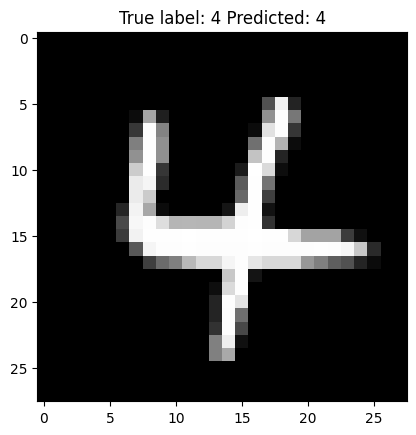

In [ ]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], prediction));

### ADAM MODEL PREDICTION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


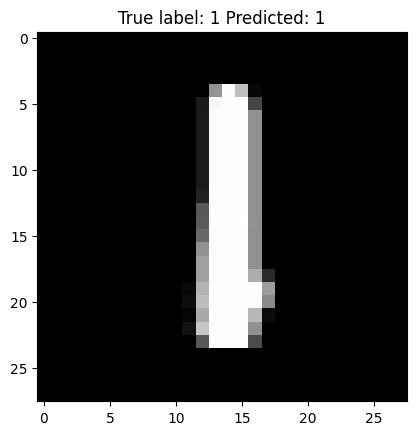

In [ ]:
# Cogemos un indice al azar y su prediccion
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model_2.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], prediction));